<a href="https://colab.research.google.com/github/AshishRaj04/Image-Compression/blob/master/ImageCompression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! mkdir image/

In [2]:
from google.colab import files
uploaded = files.upload()

Saving profile.png to profile.png


In [3]:
! mv profile.png image/

In [4]:
import matplotlib.pyplot as plt

In [6]:
original_image = plt.imread("image/profile.png")

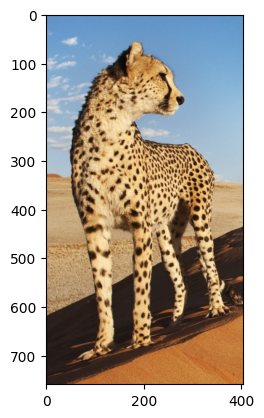

In [7]:
plt.imshow(original_image)

In [8]:
print("The shape of the image is: ",original_image.shape)

The shape of the image is:  (759, 405, 4)


In [9]:
import numpy as np

In [10]:
X_img = np.reshape(original_image , (original_image.shape[0] * original_image.shape[1] , original_image.shape[2]))

In [11]:
X_img.shape

(307395, 4)

In [12]:
def nearest_centroid(X , centroid):
  k = centroid.shape[0]
  c = np.zeros(X.shape[0] , dtype=int)

  for i in range(X.shape[0]):
    distance = []
    for j in range(k):
      norm_ij = np.linalg.norm(X[i] - centroid[j])
      distance.append(norm_ij)
    c[i] = np.argmin(distance)
  return c

In [13]:
def compute_centroid(X , c , k):
  m , n = X.shape
  centroids = np.zeros((k , n))
  for i in range(k):
    centroids[i] = np.mean(X[c == i] , axis = 0)
  return centroids

In [14]:
def initialize_centroid(X , k):
  random_index = np.random.permutation(X.shape[0])
  return X[random_index[:k]]

In [15]:
from matplotlib.colors import ListedColormap

In [16]:
def plot_data_points(X, idx):
    cmap = ListedColormap(["red", "green", "blue"])
    c = cmap(idx)
    plt.scatter(X[:, 0], X[:, 1], facecolors='none', edgecolors=c, linewidth=0.1, alpha=0.7)

In [17]:
def draw_line(p1, p2, style="-k", linewidth=1):
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], style, linewidth=linewidth)

In [18]:
def plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i):
    plot_data_points(X, idx)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='k', linewidths=3)
    for j in range(centroids.shape[0]):
        draw_line(centroids[j, :], previous_centroids[j, :])

    plt.title("Iteration number %d" %i)

In [19]:
def run_kMeans(X, initial_centroids, iter, plot_progress=False):
    m, n = X.shape
    k = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))


    for i in range(iter):
        print("K-Means iteration %d/%d" % (i, iter-1))
        idx = nearest_centroid(X, centroids)
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, k, i)
            previous_centroids = centroids
        centroids = compute_centroid(X, idx, k)
    plt.show()
    return centroids, idx

In [20]:
k = 16
iter = 4
initial_centroids = initialize_centroid(X_img , k)
centroids , c = run_kMeans(X_img , initial_centroids , iter )

K-Means iteration 0/3
K-Means iteration 1/3
K-Means iteration 2/3
K-Means iteration 3/3


<Figure size 800x600 with 0 Axes>

In [21]:
print("The shape of the centroid is: ",centroids.shape)
print("The shape of c is: ",c.shape)
print("The first 10 data points are associated of these centroids: ",c[:10])

The shape of the centroid is:  (16, 4)
The shape of c is:  (307395,)
The first 10 data points are associated of these centroids:  [12 12 12 12 12 12 12 12 12 12]


In [22]:
def show_centroid_colors(centroids):
    palette = np.expand_dims(centroids, axis=0)
    num = np.arange(0,len(centroids))
    plt.figure(figsize=(16, 16))
    plt.xticks(num)
    plt.yticks([])
    plt.imshow(palette)

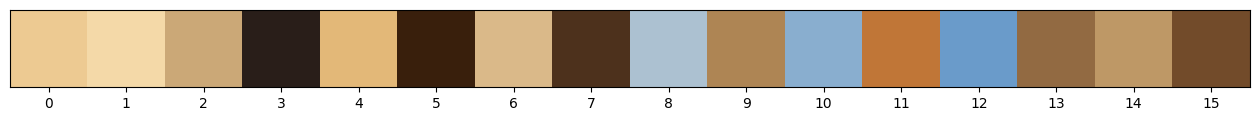

In [23]:
show_centroid_colors(centroids)

In [24]:
c = nearest_centroid(X_img , centroids)
X_recovered = centroids[c, :]
X_recovered = np.reshape(X_recovered , (original_image.shape[0] , original_image.shape[1] , original_image.shape[2]))

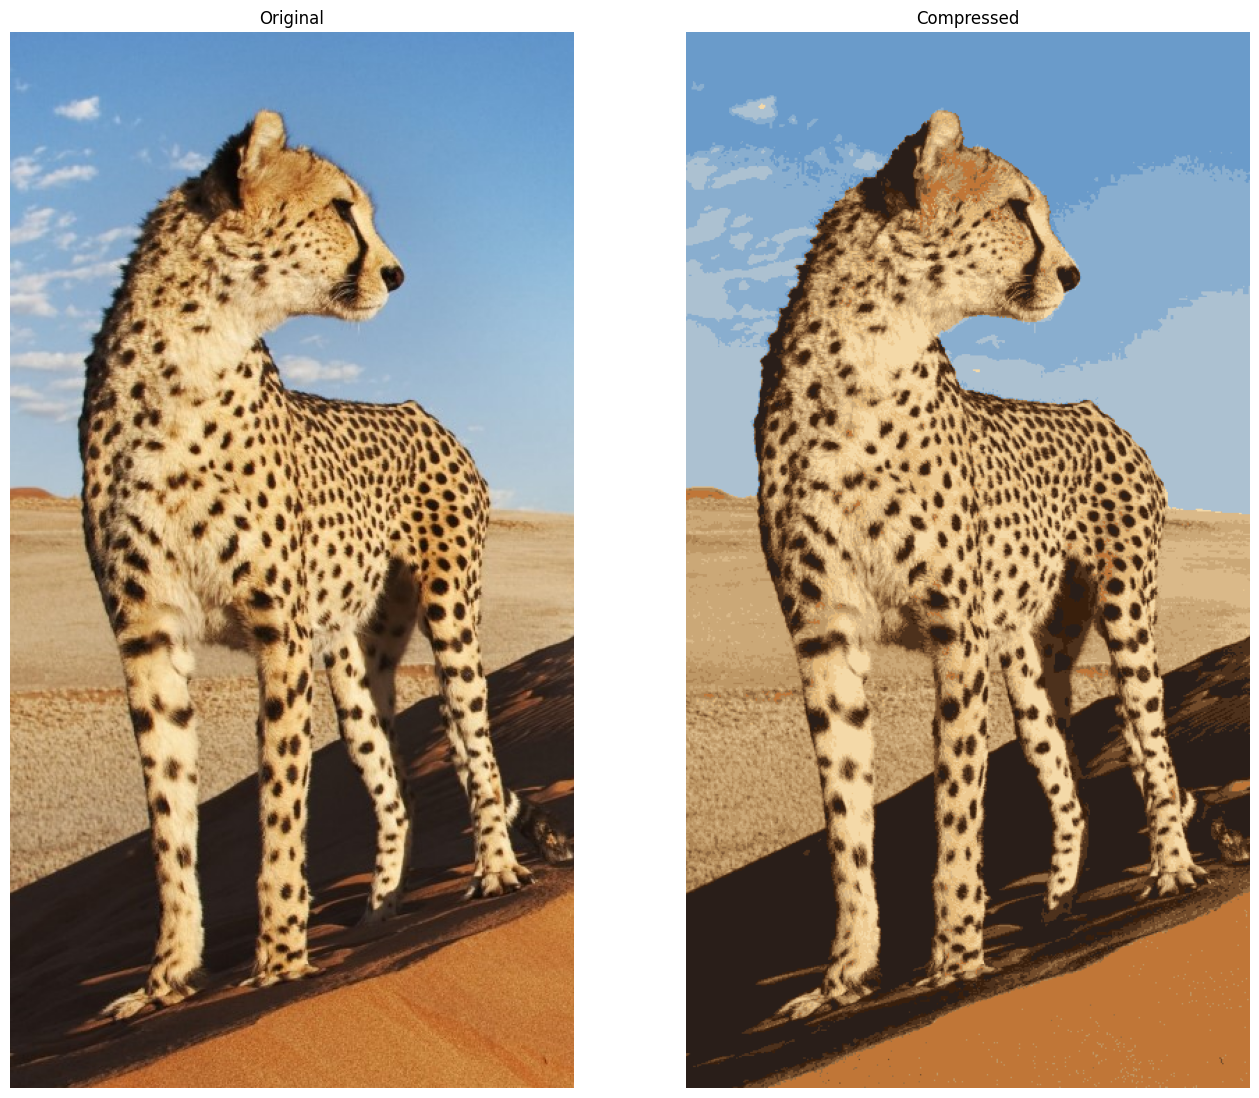

In [25]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_image)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed')
ax[1].set_axis_off()